<a href="https://colab.research.google.com/github/mrrajatgarg/kaggle/blob/master/catVsdogLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrrajatgarg","key":"ae5a419aa72b781b3ca5459616930b23"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jan 26 09:02 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!ls

kaggle.json  sample_data


In [0]:
!mkdir kaggle

In [0]:
!mkdir kaggle/dogVscat

In [11]:
cd kaggle/dogVscat

/content/kaggle/dogVscat


In [0]:
!ls

In [13]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.0MB/s]
 99% 268M/271M [00:03<00:00, 81.2MB/s]
100% 271M/271M [00:04<00:00, 70.6MB/s]
 97% 529M/543M [00:09<00:00, 120MB/s]
100% 543M/543M [00:10<00:00, 56.3MB/s]


In [14]:
!ls

sampleSubmission.csv  test1.zip  train.zip


In [15]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [16]:
!ls

sampleSubmission.csv  test1.zip  train	train.zip


In [17]:
cd train

/content/kaggle/dogVscat/train


In [18]:
!ls

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [21]:
cd /content/kaggle/dogVscat/

/content/kaggle/dogVscat


In [22]:
!ls

sampleSubmission.csv  test1.zip  train	train.zip


In [29]:
!unzip test1.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

In [48]:
!ls

sampleSubmission.csv  test1  test1.zip	train  train.zip


In [0]:
## Problem Solving starts from here

# Problem Solving starts from here

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test1/'

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'dog' in image_file.lower() :
      y[0,i] = 1
    elif 'cat' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%1000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [66]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 1000 of 25000
Proceed 2000 of 25000
Proceed 3000 of 25000
Proceed 4000 of 25000
Proceed 5000 of 25000
Proceed 6000 of 25000
Proceed 7000 of 25000
Proceed 8000 of 25000
Proceed 9000 of 25000
Proceed 10000 of 25000
Proceed 11000 of 25000
Proceed 12000 of 25000
Proceed 13000 of 25000
Proceed 14000 of 25000
Proceed 15000 of 25000
Proceed 16000 of 25000
Proceed 17000 of 25000
Proceed 18000 of 25000
Proceed 19000 of 25000
Proceed 20000 of 25000
Proceed 21000 of 25000
Proceed 22000 of 25000
Proceed 23000 of 25000
Proceed 24000 of 25000
X.shape is (12288, 12500)
Proceed 0 of 12500
Proceed 1000 of 12500
Proceed 2000 of 12500
Proceed 3000 of 12500
Proceed 4000 of 12500
Proceed 5000 of 12500
Proceed 6000 of 12500
Proceed 7000 of 12500
Proceed 8000 of 12500
Proceed 9000 of 12500
Proceed 10000 of 12500
Proceed 11000 of 12500
Proceed 12000 of 12500


In [67]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (12288, 25000)
Test shape: (12288, 12500)


In [0]:
classes = {0: 'cats',
          1: 'dogs'}

In [0]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

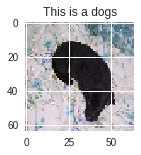

In [71]:
show_images(X_train.T, y_train.T, 2)

In [0]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

In [0]:
clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

In [76]:
clf.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [77]:
print("Model accuracy : {:.2f}%".format(clf.score(X_train_lr, y_train_lr))*100)

Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accuracy : 0.73%Model accu

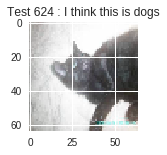

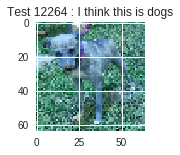

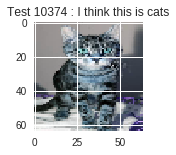

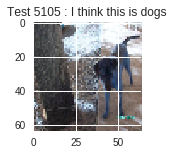

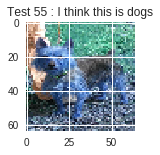

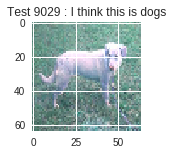

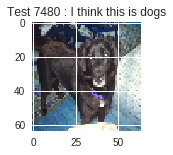

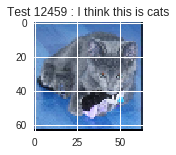

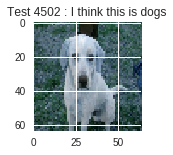

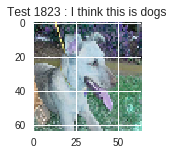

In [82]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, clf)

In [0]:
submission = pd.DataFrame(np.hstack([test_idx, clf.predict_proba(X_test_lr)]), columns=['id', 'cat', 'dog'])

In [0]:
submission = submission.drop(['cat'], axis=1)
submission = submission.rename(index=str, columns={"dog": "label"})
submission['id'] = submission['id'].astype(int)
submission.sort_values('id', inplace=True)

In [85]:
submission.head()

,id,label
9957,1,0.285982
5193,2,0.709903
12383,3,0.467507
6108,4,0.953114
6374,5,0.646719


In [0]:
submission.to_csv('Dog_vs_Cat_Submission.csv', index=False)

In [0]:
from google.colab import files

In [0]:
files.download('Dog_vs_Cat_Submission.csv') 